In [95]:
import pandas as pd
import numpy as np
import os
import gmaps
import matplotlib.pyplot as plt


In [96]:
sheet_names = ["MYE2 - 2017 All", "MYE2 - 2016 All", "MYE2 - 2015 All", "MYE2 - 2014 All", "MYE2 - 2013 All", "MYE2 - 2012 All"]
df_2012_to_2017 = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name=sheet_names)

In [97]:
def age_aggregator(df,list_of_age_ranges,sheet_name=""):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_df = pd.DataFrame()
    new_df.loc[:, "Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        prefix = sheet_name[7:11]
        col_name = f"{prefix}: {tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            df_subset = df[col_list].copy()
            df_subset_sum = df_subset.sum(axis=1) / 1000
            new_df.loc[:, col_name] = df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_df

In [98]:
master_df = pd.DataFrame()
list_of_age_ranges = [(18,31),(31,46),(46,56),(56,91)]

for sheet in sheet_names:
    current_df = df_2012_to_2017[sheet]
    current_df_by_region = current_df[current_df["Geography"]=="Region"].copy()
    popn_data_summary = age_aggregator(current_df_by_region,list_of_age_ranges,sheet)
    if master_df.size == 0:
        master_df = popn_data_summary.copy()
    else:
        master_df = pd.merge(master_df, popn_data_summary, on="Name")

Calculating total age for 2017: 18 - 30 yrs ('000s)
Calculating total age for 2017: 31 - 45 yrs ('000s)
Calculating total age for 2017: 46 - 55 yrs ('000s)
Calculating total age for 2017: 56 - 90 yrs ('000s)
Calculating total age for 2016: 18 - 30 yrs ('000s)
Calculating total age for 2016: 31 - 45 yrs ('000s)
Calculating total age for 2016: 46 - 55 yrs ('000s)
Calculating total age for 2016: 56 - 90 yrs ('000s)
Calculating total age for 2015: 18 - 30 yrs ('000s)
Calculating total age for 2015: 31 - 45 yrs ('000s)
Calculating total age for 2015: 46 - 55 yrs ('000s)
Calculating total age for 2015: 56 - 90 yrs ('000s)
Calculating total age for 2014: 18 - 30 yrs ('000s)
Calculating total age for 2014: 31 - 45 yrs ('000s)
Calculating total age for 2014: 46 - 55 yrs ('000s)
Calculating total age for 2014: 56 - 90 yrs ('000s)
Calculating total age for 2013: 18 - 30 yrs ('000s)
Calculating total age for 2013: 31 - 45 yrs ('000s)
Calculating total age for 2013: 46 - 55 yrs ('000s)
Calculating 

In [99]:
master_df

,Name,2017: 18 - 30 yrs ('000s),2017: 31 - 45 yrs ('000s),2017: 46 - 55 yrs ('000s),2017: 56 - 90 yrs ('000s),2016: 18 - 30 yrs ('000s),2016: 31 - 45 yrs ('000s),2016: 46 - 55 yrs ('000s),2016: 56 - 90 yrs ('000s),2015: 18 - 30 yrs ('000s),...,2014: 46 - 55 yrs ('000s),2014: 56 - 90 yrs ('000s),2013: 18 - 30 yrs ('000s),2013: 31 - 45 yrs ('000s),2013: 46 - 55 yrs ('000s),2013: 56 - 90 yrs ('000s),2012: 18 - 30 yrs ('000s),2012: 31 - 45 yrs ('000s),2012: 46 - 55 yrs ('000s),2012: 56 - 90 yrs ('000s)
0,NORTH EAST,456.270,466.550,374.865,819.631,459.245,469.364,375.756,806.581,458.634,...,377.977,782.950,456.507,480.967,378.653,769.338,454.283,487.469,376.667,758.936
1,NORTH WEST,1237.231,1343.029,1024.726,2110.365,1241.696,1348.508,1022.281,2078.036,1238.479,...,1008.294,2019.540,1233.356,1371.293,999.330,1989.745,1239.265,1386.783,986.839,1966.656
2,YORKSHIRE AND THE HUMBER,957.574,997.039,757.841,1579.195,960.535,1003.966,754.220,1554.249,956.787,...,742.931,1508.761,952.667,1027.256,735.604,1484.652,954.498,1037.398,726.030,1466.051
3,EAST MIDLANDS,807.553,867.548,682.519,1425.303,800.178,869.140,677.108,1398.303,792.813,...,662.896,1349.330,776.552,882.925,653.280,1324.719,771.275,893.485,641.230,1305.079
4,WEST MIDLANDS,1018.771,1083.172,806.071,1669.788,1011.808,1082.537,800.231,1643.847,998.573,...,780.778,1600.875,980.218,1095.653,769.700,1578.295,976.011,1105.182,756.643,1560.520
5,EAST,935.487,1179.584,876.744,1852.176,942.281,1180.474,871.293,1821.187,943.856,...,850.233,1761.730,930.965,1181.267,836.783,1728.853,930.373,1187.963,820.243,1701.783
6,LONDON,1715.394,2211.218,1130.029,1767.001,1752.035,2195.648,1115.087,1725.112,1770.419,...,1073.305,1644.177,1781.882,2095.397,1046.867,1605.933,1804.874,2058.853,1018.293,1573.600
7,SOUTH EAST,1409.739,1731.646,1307.117,2688.458,1413.170,1742.257,1299.029,2641.553,1405.625,...,1272.705,2550.280,1390.645,1757.467,1252.681,2501.833,1389.768,1769.905,1227.329,2461.653
8,SOUTH WEST,872.792,968.262,786.456,1835.329,869.928,972.059,781.983,1802.105,867.293,...,767.844,1742.565,850.267,987.475,759.177,1711.164,844.219,998.322,746.193,1686.748


In [100]:
df_2015 = master_df[["Name", "2015: 18 - 30 yrs ('000s)","2015: 31 - 45 yrs ('000s)", "2015: 46 - 55 yrs ('000s)", "2015: 56 - 90 yrs ('000s)"]]
df_2015 = df_2015.rename(columns = {"2015: 18 - 30 yrs ('000s)":"18 - 30 yrs","2015: 31 - 45 yrs ('000s)":"31 - 45 yrs","2015: 46 - 55 yrs ('000s)":"46 - 55 yrs","2015: 56 - 90 yrs ('000s)":"56 - 90 yrs"})

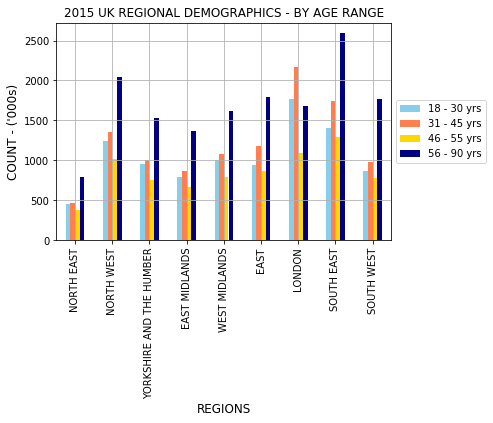

In [111]:
chart = df_2015.plot(x="Name",y=["18 - 30 yrs","31 - 45 yrs", 
                         "46 - 55 yrs", "56 - 90 yrs"],kind="bar",align="center",
                     color=["skyblue","coral","gold","navy"])
chart.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT - ('000s)",size=12)
plt.title("2015 UK REGIONAL DEMOGRAPHICS - BY AGE RANGE")
plt.grid()
plt.savefig("../Visualizations/age_range_bar_chart.png",bbox_inches="tight")

In [102]:
gender_sheets_2015 = ["MYE2 - 2015 M", "MYE2 - 2015 F"]
gender_master = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name=gender_sheets_2015)

In [106]:
def gender_by_age_aggregator(df,list_of_age_ranges,sheet_name=""):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_gender_df = pd.DataFrame()
    new_gender_df.loc[:, "Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        prefix = sheet_name[12:13]
        col_name = f"{prefix}: {tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            gender_df_subset = df[col_list].copy()
            gender_df_subset_sum = gender_df_subset.sum(axis=1) / 1000
            new_gender_df.loc[:, col_name] = gender_df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_gender_df

In [107]:
gender_master_df = pd.DataFrame()
list_of_age_ranges = [(18,31),(31,46),(46,56),(56,91)]

for sheet in gender_sheets_2015:
    current_gender_df = gender_master[sheet]
    current_gender_df_by_region = current_gender_df[current_gender_df["Geography"]=="Region"].copy()
    gender_popn_data_summary = gender_by_age_aggregator(current_gender_df_by_region,list_of_age_ranges,sheet)
    if gender_master_df.size == 0:
        gender_master_df = gender_popn_data_summary.copy()
    else:
        gender_master_df = pd.merge(gender_master_df, gender_popn_data_summary, on="Name")

Calculating total age for M: 18 - 30 yrs ('000s)
Calculating total age for M: 31 - 45 yrs ('000s)
Calculating total age for M: 46 - 55 yrs ('000s)
Calculating total age for M: 56 - 90 yrs ('000s)
Calculating total age for F: 18 - 30 yrs ('000s)
Calculating total age for F: 31 - 45 yrs ('000s)
Calculating total age for F: 46 - 55 yrs ('000s)
Calculating total age for F: 56 - 90 yrs ('000s)


In [108]:
gender_master_df

,Name,M: 18 - 30 yrs ('000s),M: 31 - 45 yrs ('000s),M: 46 - 55 yrs ('000s),M: 56 - 90 yrs ('000s),F: 18 - 30 yrs ('000s),F: 31 - 45 yrs ('000s),F: 46 - 55 yrs ('000s),F: 56 - 90 yrs ('000s)
0,NORTH EAST,233.447,230.077,184.131,370.250,225.187,240.444,192.770,423.908
1,NORTH WEST,625.953,667.866,501.379,959.736,612.526,682.305,516.675,1087.159
2,YORKSHIRE AND THE HUMBER,484.467,501.255,372.703,714.603,472.320,506.556,377.268,815.519
3,EAST MIDLANDS,402.628,428.993,332.915,648.180,390.185,439.947,339.182,723.886
4,WEST MIDLANDS,509.015,537.793,392.110,760.581,489.558,543.939,399.183,860.440
5,EAST,480.937,581.143,427.127,837.948,462.919,597.410,435.721,952.808
6,LONDON,882.166,1106.168,541.052,777.702,888.253,1059.350,555.769,904.735
7,SOUTH EAST,716.742,856.070,638.974,1208.393,688.883,886.626,649.793,1385.287
8,SOUTH WEST,445.625,482.152,381.953,825.115,421.668,492.709,394.243,945.991


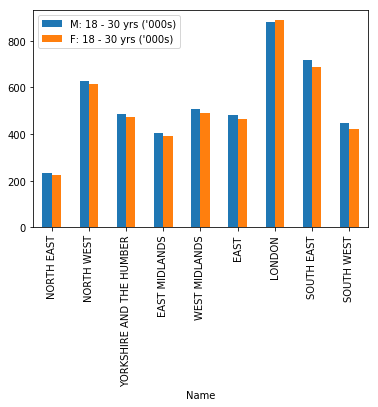

In [123]:
gender_master_df.plot(x="Name",y=["M: 18 - 30 yrs ('000s)","F: 18 - 30 yrs ('000s)"],kind="bar")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

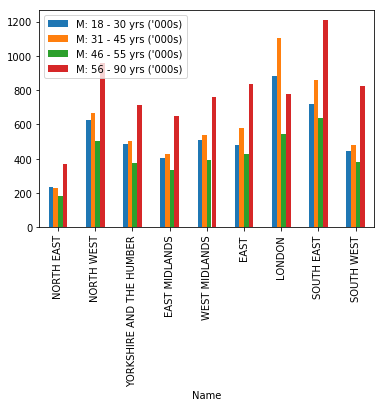

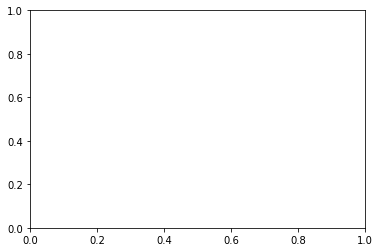

In [117]:
males = gender_master_df[["M: 18 - 30 yrs ('000s)","M: 31 - 45 yrs ('000s)","M: 46 - 55 yrs ('000s)","M: 56 - 90 yrs ('000s)"]]
females = gender_master_df[["F: 18 - 30 yrs ('000s)","F: 31 - 45 yrs ('000s)","F: 46 - 55 yrs ('000s)","F: 56 - 90 yrs ('000s)"]]
p1 = gender_master_df.plot(x="Name",y=["M: 18 - 30 yrs ('000s)","M: 31 - 45 yrs ('000s)",
                                       "M: 46 - 55 yrs ('000s)","M: 56 - 90 yrs ('000s)"],yerr=males,kind="bar")
p1 = gender_master_df.plot(x="Name",y=["F: 18 - 30 yrs ('000s)","F: 31 - 45 yrs ('000s)",
                                       "F: 46 - 55 yrs ('000s)","F: 56 - 90 yrs ('000s)"],yerr=females,kind="bar",bottom=males)